In [ ]:
import numpy as np
import pandas as pd #for data manipulation, dataframe=2D table like excel/SQL, series= single column (one variable)
from sklearn.datasets import fetch_openml #function, downloads dataset from openml website returns object with data,target,feature names

In [ ]:
boston = fetch_openml(name="boston", version= 1, as_frame= True) #as_frame returns dataset as dataframe for pandas, not numpy
print(boston.keys())
for key in boston:
    print(key)
x = boston.data #show features as dataframe
y = boston.target #show target as series

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])
data
target
frame
categories
feature_names
target_names
DESCR
details
url


In [ ]:
print("Feature matrix shape : ", x.shape) #506 samples with 13 features
print("Target vector shape : ", y.shape) #median value of homes in 1000s
display(x.head()) #view rows, slice it like a matrix, can also acess columns by names
display(y.head())
#pandas are good for seeing columns, readability, slicing, filtering, debugging, handling missing data, data types: IDEAL for Exploring&Cleaning
#numpy faster, just pure numbers in a matrix ideal for math modelling after

Feature matrix shape :  (506, 13)
Target vector shape :  (506,)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [ ]:
#linear regression from scratch
x_np = x.apply(pd.to_numeric, errors='coerce').to_numpy() #convert to numpy array, converting to all cols in dataframe then errors converts to NaN instead of str
y_np = y.to_numpy()
#np.hstack() horizontally stacks arrays so adds them column wise
print(x_np.shape)
print(x_np.shape[0])
print(x_np)
# np.ones(([x_np.shape[0]],1)) creates column of ones to act as b/intercept, here have 506 rows gotten from x_np.shape[0], and 1 column from the #1
x_np_b= np.hstack((np.ones((x_np.shape[0],1)),x_np)) #this gives two arrays 506x1 and 506x13, then hstack merges them and assigns it to the initial variable x_np
print(x_np_b.shape)
print(x_np_b) #x_np_b is with bias of 1s as first column
#normal eqn linear: Xw=y -> w=(XTX)-1XTy
w = np.linalg.inv(x_np_b.T @ x_np_b) @ x_np_b.T @ y_np
print(w.shape)
print(w)

(506, 13)
506
[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 14)
[[1.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [1.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [1.0000e+00 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0000e+00 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [1.0000e+00 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(14,)
[ 3.64594884e+01 -1.08011358e-01  4.64204584e-02  2.05586264e-02
  2.68673382e+00 

In [ ]:
#MSE Loss function is (Xw-y)^2=L. Its gradient tells us directin of steepest increase in loss. Minimum is when this grad is 0, where slope of loss surface is 0.
#so take derivative and set it to 0 gives us "the normal equation", which i view as Xw = yhat solving for w; this is orthogonal projection of y onto column space of X
#e=yhat-Xw error between target and project which at minimum is orthogonal
#Xw is col(X) linear comboination of its columns
#X maps w from parameter space (13) to data/output space (506), XT maps output/data space (506) to parameter space (13)
#XT pullsback vectors from data to paramter space, and givers direction in parameter space to increase alignment with the output vector *XT is a gradient operator defines orthogonality*

In [ ]:
#Diff Geo: 13D parameter manifold-each point is a linear model of xTw=yh, and we are optimizing a scalar loss function above the manifold like a bowl above. It maps M->R
#differential is exterior derivative on scalar function=1form lives in cotangent of M, if metric exists then can convert to grad vector which lives on tangent space
#At each point w it maps a direction vector on the tangent manifold (v) to the directional derivative of the loss in that direction: how L(w) inc or dec as move from w in direction of v
#the 1 form takes a tangent vector(so the grad)=v and returns a direction derivative of the loss if starting at w moving in direction of v

In [ ]:
#GRADIENT DESCENT MANUUAL-linear regression from scratch for diff geo perspective- DO LATER
# Initialize w randomly
"""
w = np.random.randn(X_with_bias.shape[1], 1)

learning_rate = 1e-4
epochs = 1000

for epoch in range(epochs):
    y_pred = X_with_bias @ w
    error = y_pred - y_np
    grad = 2 * X_with_bias.T @ error  # Gradient of squared loss
    w -= learning_rate * grad

print("Trained weights:", w)
"""

'w = np.random.randn(X_with_bias.shape[1], 1)\n\nlearning_rate = 1e-4\nepochs = 1000\n\nfor epoch in range(epochs):\n    y_pred = X_with_bias @ w\n    error = y_pred - y_np\n    grad = 2 * X_with_bias.T @ error  # Gradient of squared loss\n    w -= learning_rate * grad\n\nprint("Trained weights:", w)\n'

In [ ]:
#y is median price the target and x is 13 features we have a matrix that when applied to x lets you predict the price
y_pred = x_np_b @ w
print(y_pred.shape)
#mean squared error
mse = np.mean(y_pred - y_np)**2
print(mse)
print(x.columns)

(506,)
1.00145869561675e-23
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


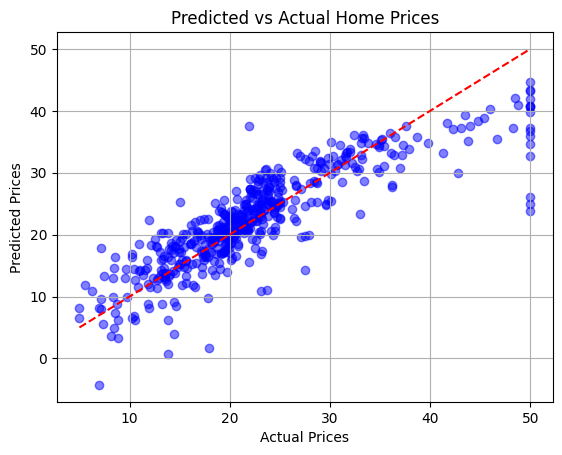

In [ ]:
#Actual vs Predicted
import matplotlib.pyplot as plt

plt.scatter(y_np, y_pred, color='blue', alpha=0.5)
#x-axis: the actual house price (y_np[i]), y-axis: the predicted house price (y_pred[i])

plt.plot([y_np.min(), y_np.max()], [y_np.min(), y_np.max()], color='red', linestyle='--')
# if predicted= actual is perfect match thent he predictions will line up along the diagonal red line

plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Predicted vs Actual Home Prices")
plt.grid(True)
plt.show()


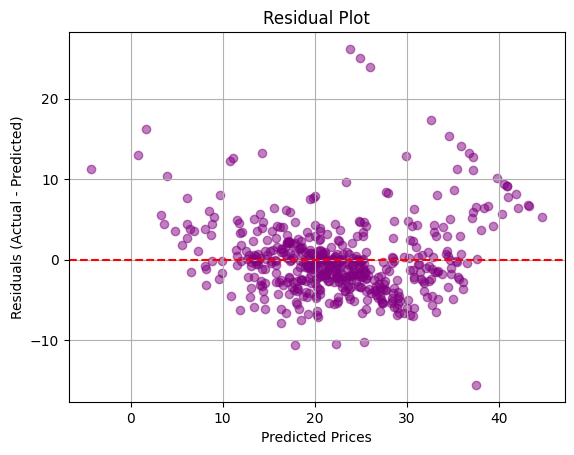

In [ ]:
#Residue Plot
residuals = y_np - y_pred

plt.scatter(y_pred, residuals, color='purple', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')

plt.xlabel("Predicted Prices")
plt.ylabel("Residuals (Actual - Predicted)")
plt.title("Residual Plot")
plt.grid(True)
plt.show()


In [ ]:
#yhat= w0 + w1x1 etc... , so coefficients of weight tells us how feature affects price, larger more effective, but not standardized diff units
#Normalize features so mean is 0 and sd is 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() #this does x-mean/standard deviation, per feature
x_std = scaler.fit_transform(x_np) #.fit(x_np) calculates mean and standard deviation and stores it in scaler.mean_ and scaler.scale_
#.transform then applies it to every datavalue in the dataset [DO WITHOUT BIAS TERM THEN]
x_std_b = np.hstack([np.ones((x_std.shape[0], 1)), x_std])  # Add bias

#calc new w now that standardized
w_std = np.linalg.inv(x_std_b.T @ x_std_b) @ x_std_b.T @ y_np
print(w_std)
print(x.columns)
#Geometric Insight: projecting 13D feature vector onto w (direction of max fit), angle b/w w and each axis reflects how aligned feature is w/ price (&normalizing puts each axis one eqal footing)

[ 2.25328063e+01 -9.28146064e-01  1.08156863e+00  1.40899997e-01
  6.81739725e-01 -2.05671827e+00  2.67423017e+00  1.94660717e-02
 -3.10404426e+00  2.66221764e+00 -2.07678168e+00 -2.06060666e+00
  8.49268418e-01 -3.74362713e+00]
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


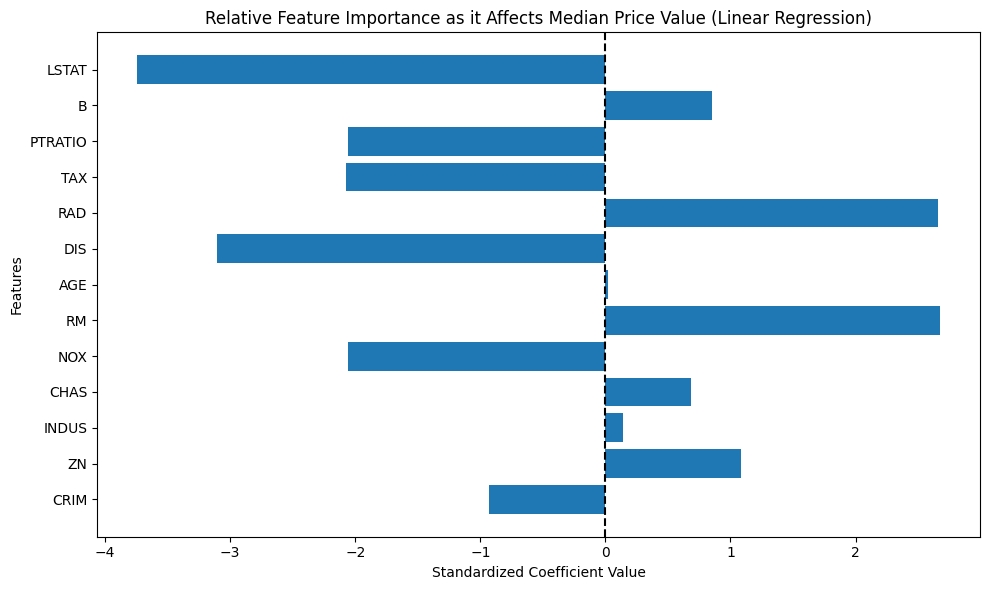

In [ ]:
import matplotlib.pyplot as plt
feature_names = x.columns
coefficients = w_std[1:] #exclude bias

plt.figure(figsize= (10, 6))
plt.barh(feature_names, coefficients) #plots horizontal bar chart, each bar is a coefficient with y axis=feature names and x axis=w_std coefficients

plt.axvline(0, color='k', linestyle='--') #adds vertical dashed line
plt.ylabel("Features")
plt.xlabel("Standardized Coefficient Value")
plt.title("Relative Feature Importance as it Affects Median Price Value (Linear Regression)")
plt.tight_layout() #Automatically adjusts spacing and layout=Cleaner overall
plt.show() #plots on screen, may not appear without 'scripts'-w/e that is

In [ ]:
#New House Example-mostly copy and paste
from sklearn.preprocessing import StandardScaler
import numpy as np

# Your fitted scaler from before
# Assume: X_std = scaler.fit_transform(X_np)

# New raw house input (13 features)
new_house = np.array([[0.1, 20.0, 6.5, 70.0, 300.0, 15.0, 390.0, 5.0, 4.0, 0.5, 300.0, 20.0, 5.0]])

# Standardize it using the same scaler
new_house_std = scaler.transform(new_house)

# Add bias term
new_house_std_b = np.hstack([np.ones((1, 1)), new_house_std])

# Predict using standardized weights
predicted_price = new_house_std_b @ w_std

print("Predicted price for the new house:", predicted_price[0])

mean_house = scaler.transform(x_np.mean(axis=0, keepdims=True))
mean_house_b = np.hstack([np.ones((1, 1)), mean_house])
pred_mean_price = mean_house_b @ w_std
print("Predicted price for average house:", pred_mean_price[0])


Predicted price for the new house: -5341.404859280845
Predicted price for average house: 22.532806324110666
